# Titanic-Deep Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#!pip install termcolor
from termcolor import colored

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense







In [112]:
df1 = pd.read_csv("ttrain.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df2=pd.read_csv("ttest.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
df = pd.concat([df1, df2], ignore_index=True)
df_copy = df.copy()

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [117]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1143,1144,NaN,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C


In [118]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 1309
Features     -------> 12
Shape of dataset: (1309, 12)
************************* TYPES OF FEATURES **************************
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age     

In [119]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


### Missing values

In [120]:
# AGE

In [121]:
df["Age"].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

In [122]:
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.")
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [123]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')
df["Title"].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [124]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
df["Age"].isnull().sum()

0

In [125]:
# Fare

In [126]:
df["Fare"].isnull().sum()

1

In [127]:
df["Fare"].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [128]:
df["Fare"].mean()

33.29547928134557

In [129]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mode()[0])
df["Fare"].isnull().sum()

0

In [130]:
# Cabin----cabin numbers are not important so we can drop it

In [131]:
df["Cabin"].isnull().sum()

1014

In [132]:
df["Cabin"].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [133]:
# Embarked


In [134]:
df["Embarked"].isnull().sum()

2

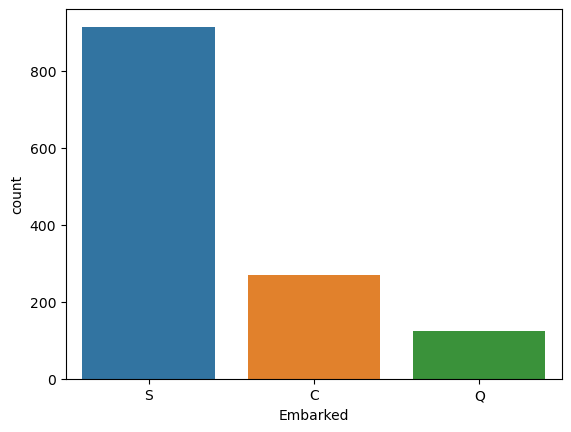

In [135]:
sns.countplot(x=df["Embarked"]);

In [136]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"].isnull().sum()

0

In [137]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1) # axis=1 for column


In [138]:
df = df.to_pickle("df.pkl")

In [21]:
df = pd.read_pickle("df.pkl")

## Data Preprocessing

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
train = df[:891]
test = df[891:]

In [24]:
X = train.drop("Survived", axis=1) # axis=1 for column
y = train[["Survived"]]

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### MODELLING

In [26]:
model = Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(70, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
history = model.fit(X, y, epochs=250, validation_split=0.2, batch_size=32)

Epoch 1/250
23/23 [==============================] - 2s 12ms/step - loss: 0.6470 - accuracy: 0.6096 - val_loss: 0.5021 - val_accuracy: 0.6425
Epoch 2/250
23/23 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.6728 - val_loss: 0.4580 - val_accuracy: 0.8603
Epoch 3/250
23/23 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.8062 - val_loss: 0.4377 - val_accuracy: 0.8771
Epoch 4/250
23/23 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8202 - val_loss: 0.3605 - val_accuracy: 0.8827
Epoch 5/250
23/23 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8174 - val_loss: 0.3297 - val_accuracy: 0.8827
Epoch 6/250
23/23 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8315 - val_loss: 0.3483 - val_accuracy: 0.8492
Epoch 7/250
23/23 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8188 - val_loss: 0.3499 - val_accuracy: 0.8939
Epoch 8/250


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 120)               1440      
                                                                 
 dense_12 (Dense)            (None, 90)                10890     
                                                                 
 dense_13 (Dense)            (None, 70)                6370      
                                                                 
 dense_14 (Dense)            (None, 60)                4260      
                                                                 
 dense_15 (Dense)            (None, 50)                3050      
                                                                 
 dense_16 (Dense)            (None, 40)                2040      
                                                                 
 dense_17 (Dense)            (None, 30)               

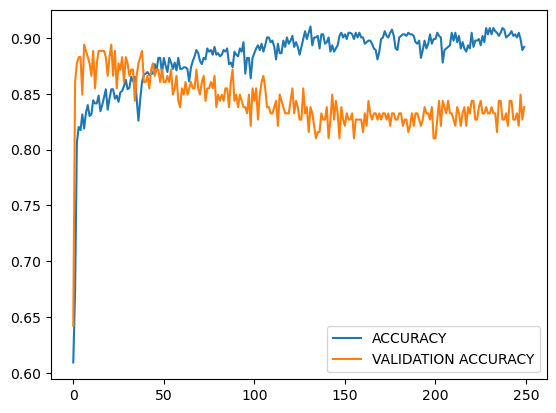

In [29]:
plt.plot(history.history["accuracy"], label="ACCURACY")
plt.plot(history.history["val_accuracy"], label="VALIDATION ACCURACY")
plt.legend();

In [30]:
test1 = test.drop(["Survived"], axis=1)
test1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
891,3,34.5,0,0,7.8292,True,True,False,False,True,False
892,3,47.0,1,0,7.0000,False,False,True,False,False,True
893,2,62.0,0,0,9.6875,True,True,False,False,True,False
894,3,27.0,0,0,8.6625,True,False,True,False,True,False
895,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30.0,0,0,8.0500,True,False,True,False,True,False
1305,1,39.0,0,0,108.9000,False,False,False,False,False,True
1306,3,38.5,0,0,7.2500,True,False,True,False,True,False
1307,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [31]:
scaler = StandardScaler()
test1 = scaler.fit_transform(test1)

In [32]:
model_pred = model.predict(test1)
pred_final = (model_pred > 0.5).astype(int).reshape(test1.shape[0])
pred_final


14/14 [==============================] - 0s 1ms/step


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
predictions = pd.DataFrame()
predictions["PassengerId"] = df2["PassengerId"]
predictions["Survived"] = pred_final
predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
predictions["Survived"] = predictions["Survived"].astype(int)

In [36]:
predictions.to_csv("titanic_submission.csv", index=False)